# 1 Aims, Objectives and Background
## 1.1	Introduction
As time has passed, football has developed into more than just a physical sport. It has become a technological game in recent times as well. The utilization of data in football has become very important in the development of a player and gaining an advantage in a match, where data analyst would analyze every aspect of the opponent’s game to give feedback to the manager.

## 1.2	Aims and Objectives
With this project, I would like to explore the following areas of football
   -	Which aspect of the game would result in a higher winning rate
       o	Goals – Does scoring more goals equate to winning more games?
       
       o	Expected Goals (xG) – Higher xG equates to winning more games?
       
       o	Passes allowed per Defensive Action (PPDA) – A lower PPDA equate to winning more games?
       
       o	Opposition Passes allowed per Defensive Action (OPPDA) – A lower OPPDA equate to winning more games?
       
       o	Deep passes made – More penetrative passes equate to winning more games?
       
       o	Deep passes conceded – Lesser deep passes conceded equate to a higher win rate?

 For this project report, my aims are to:
   1.	Decide how much data is required to sufficiently explore the above questions, considering the constraints on time, resource and restrictions set by the school
   2.	Clean and transform data such that it will be easy and suitable for use in the techniques I would like to utilize later
   3.	Carry out exploratory data analysis to identify trends within the data which would aid in the further exploration and explanation.

## 1.3	Data
### 1.3.1	Data requirements
I decided to choose this dataset as there were data from different leagues and years, giving me a variety of data to extract and examine from, creating a comparatively fairer analysis.
### 1.3.2 Data Terminologies
xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

xpts - expected points

xpts_diff - difference between actual and expected points

### 1.3.2.1 Expected Goals (xG)
It is a metric designed to measure the probability of a shot resulting in a goal. Relying on a model that uses historical information from thousands of shots with similar characteristics to estimate the likelihood of a goal on a scale between 0 and 1 with 1 being the highest probability of the shot resulting in a goal. [2]
### 1.3.2.2 Passes Allowed per Defensive Action (PPDA) & Opposition Passes Allowed per Defensive Action (OPPDA)
This refers to the amount of passes a team allows the opponent before making a defensive action in the attacking areas, meaning that if the lower the PPDA is, the more intense the pressing of the opposition is. However, it does not represent the quality of the press, which can translate to conceding more goals. [1]

Whereas, for OPPDA, it refers to how many passes the opponent allows you to make before making a defensive action in their attacking areas, this means that if your OPPDA is high, it would mean that the opposition’s pressing isn’t as intense or your team is able to keep the ball better.
### 1.3.3 Limitations
#### 1.3.3.1 Limited free data available
As technology advances in football, there are more and more companies converting their free data into a paid or subscription-based data whereby you would either need to pay a small fee to access their database or a monthly fee. Some do offer a free version of the dataset, but this also means that it would be limited. Companies that offer these types of services are StatsBomb and Wyscout whereby their subscription fee can go up to a whopping €600.
#### 1.3.3.2 Confirmation Bias
Confirmation Bias is a psychological term for the human tendency to only seek out information that supports one position or idea. This would apply to my report as I’m only looking out for certain statistics like xG, Goals, and PPDA. Therefore, this report would be more comprehensive in research if I include more statistics.
#### 1.3.3.3 Focusing on top teams
In the initial first few lines of codes where the cleaning up of the csv file occurs, it shows the whole dataset but in the latter stages, I decided to focus on a certain set of teams in a specific league as I’ve determined that based on xG “La Liga” is the best league as they have the highest xG out of everyone and further narrowed it down to the top 5 teams based on the xG again. This means that it doesn’t give a wide overview as to football in the other leagues and the smaller teams in “La Liga”.
### 1.4 Ethical Considerations
#### 1.4.1 Use of Data
Kaggle has specified that to use their data, you are required to sign up for an account, providing them with accurate, complete, and updated registration information. Upon obtaining their data, you will only use them for your own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party and only in a manner that complies with all laws that applies to you.
#### 1.4.2 Potential impacts of using the data for proposes analyses
Certain users would have cause negative impacts on people or businesses that make a living from selling these data. In response to this, I have assessed the potential harms of this project and the manner in which I will utilize the data as minimal for the following reasons.
1.	This project will focus on analyzing data purely from my perspective, rather than criticizing and making judgements on other teams.
2.	The conclusions of this project will not be reflective of a professional analyst. Limitations of the data used in this project have been outline above.

## 2 Data Cleaning and processing
### 2.1 Data frame

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
df = pd.read_csv("understat.com.csv")                 

As shown in the code above, the last line of code is to create a data frame so that jupyter can read the csv file.

### 2.2 Adding titles to blanked headers 

In [2]:
df = df.rename(index=int,columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}) 
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


The data provided had some blanks as you can see from the renaming of the data where the ‘league’ and ‘year’ columns were left blank. Hence, in order for the smooth creation of graphs and tables, there was a need to rename them.

## 2.3 Min/Max values 

In [3]:
df.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00
mean,"2,016.50",10.06,35.94,13.43,9.07,13.43,48.19,48.19,49.37,47.06,-1.13,42.90,47.06,-1.13,42.90,0.00,10.91,10.91,208.68,208.68,49.54,0.17
std,1.71,5.58,3.20,5.88,2.94,5.51,17.61,13.87,16.96,14.60,6.85,13.70,11.78,6.66,11.00,19.29,2.52,3.30,83.89,54.71,13.56,7.16
min,"2,014.00",1.00,27.00,2.00,2.00,1.00,13.00,15.00,13.00,15.06,-30.96,13.17,16.84,-29.18,16.08,-42.21,5.68,4.39,76.00,83.00,17.91,-24.72
25%,"2,015.00",5.00,34.00,9.00,7.00,9.00,36.00,38.00,38.00,37.13,-4.99,33.81,38.92,-5.70,35.47,-13.26,9.09,8.81,151.75,170.00,39.47,-4.50
50%,"2,016.50",10.00,38.00,12.00,9.00,14.00,45.00,48.00,46.00,44.71,-0.61,40.07,47.31,-0.92,43.03,-3.13,10.56,10.35,188.00,205.00,47.10,0.12
75%,"2,018.00",15.00,38.00,16.00,11.00,17.00,56.00,58.00,59.25,53.86,3.59,49.22,54.83,3.38,50.26,9.74,12.43,12.19,242.00,246.25,56.94,4.91
max,"2,019.00",20.00,38.00,32.00,18.00,29.00,118.00,94.00,100.00,113.60,18.15,99.48,88.43,16.37,78.54,73.05,21.90,30.47,582.00,375.00,94.38,23.05


By deriving the minimum and maximum values for each column, this gives me a base line to check with if there’s any errors or discrepancies further down in the creation of graphs and tables. For example, as we can see from the image above, the maximum and minimum number of matches played a year would be 38.

## 2.4 Sorting of data

In [4]:
la_liga = df[df['league'] == "La_liga"]
la_liga.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


In [5]:
la_liga.groupby('team')[['scored', 'xG', 'wins']].sum().sort_values(by='wins', ascending=False).head()

,scored,xG,wins
team,,,
Barcelona,613,555.91,166
Real Madrid,561,509.19,156
Atletico Madrid,364,333.50,137
Sevilla,356,377.40,111
Villarreal,317,325.56,99


In [6]:
la_liga.groupby('team')[['scored', 'xG', 'wins']].mean().sort_values(by='wins', ascending=False).head()

,scored,xG,wins
team,,,
Barcelona,102.17,92.65,27.67
Real Madrid,93.50,84.86,26.00
Atletico Madrid,60.67,55.58,22.83
Sevilla,59.33,62.90,18.50
Villarreal,52.83,54.26,16.50


I’ve decided to sort the data according to the wins and focus on the top 5 teams that appear in the sort to determine which are the best teams to focus on. From the picture above, Barcelona has scored the highest number of goals and won the most number of games throughout a 5 year period. I then sorted to find the mean of each of the 5 teams to give a general idea as to whether they were performing above or below their average in each season.

## 3 Generating graphs
### 3.1 Comparing Expected Goals amongst the 6 leagues

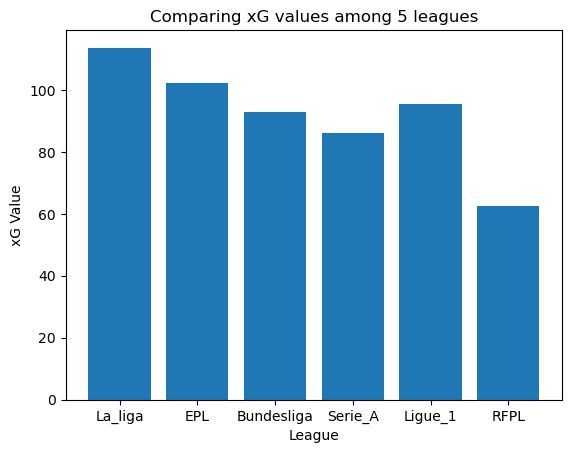

In [7]:
fig, ax = plt.subplots()

ax.bar(data=df, x='league',height='xG')

ax.set(title='Comparing xG values among 5 leagues',
      xlabel='League',
      ylabel='xG Value')

plt.show()

As seen from the graph above, it shows that the Spanish league (La Liga) has the highest amount of xG within a span of 5 years from 2014 to 2019. Thus, I’ve decided to focus on the Spanish league as in my personal opinion there is a direct relationship between xG and number of games won.

### 3.1.1 Further analysis of Expected Goals within the Spanish league

In [8]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs) 

This formula allows for the values of a clustered bar graph to be shown at the top of the bar.

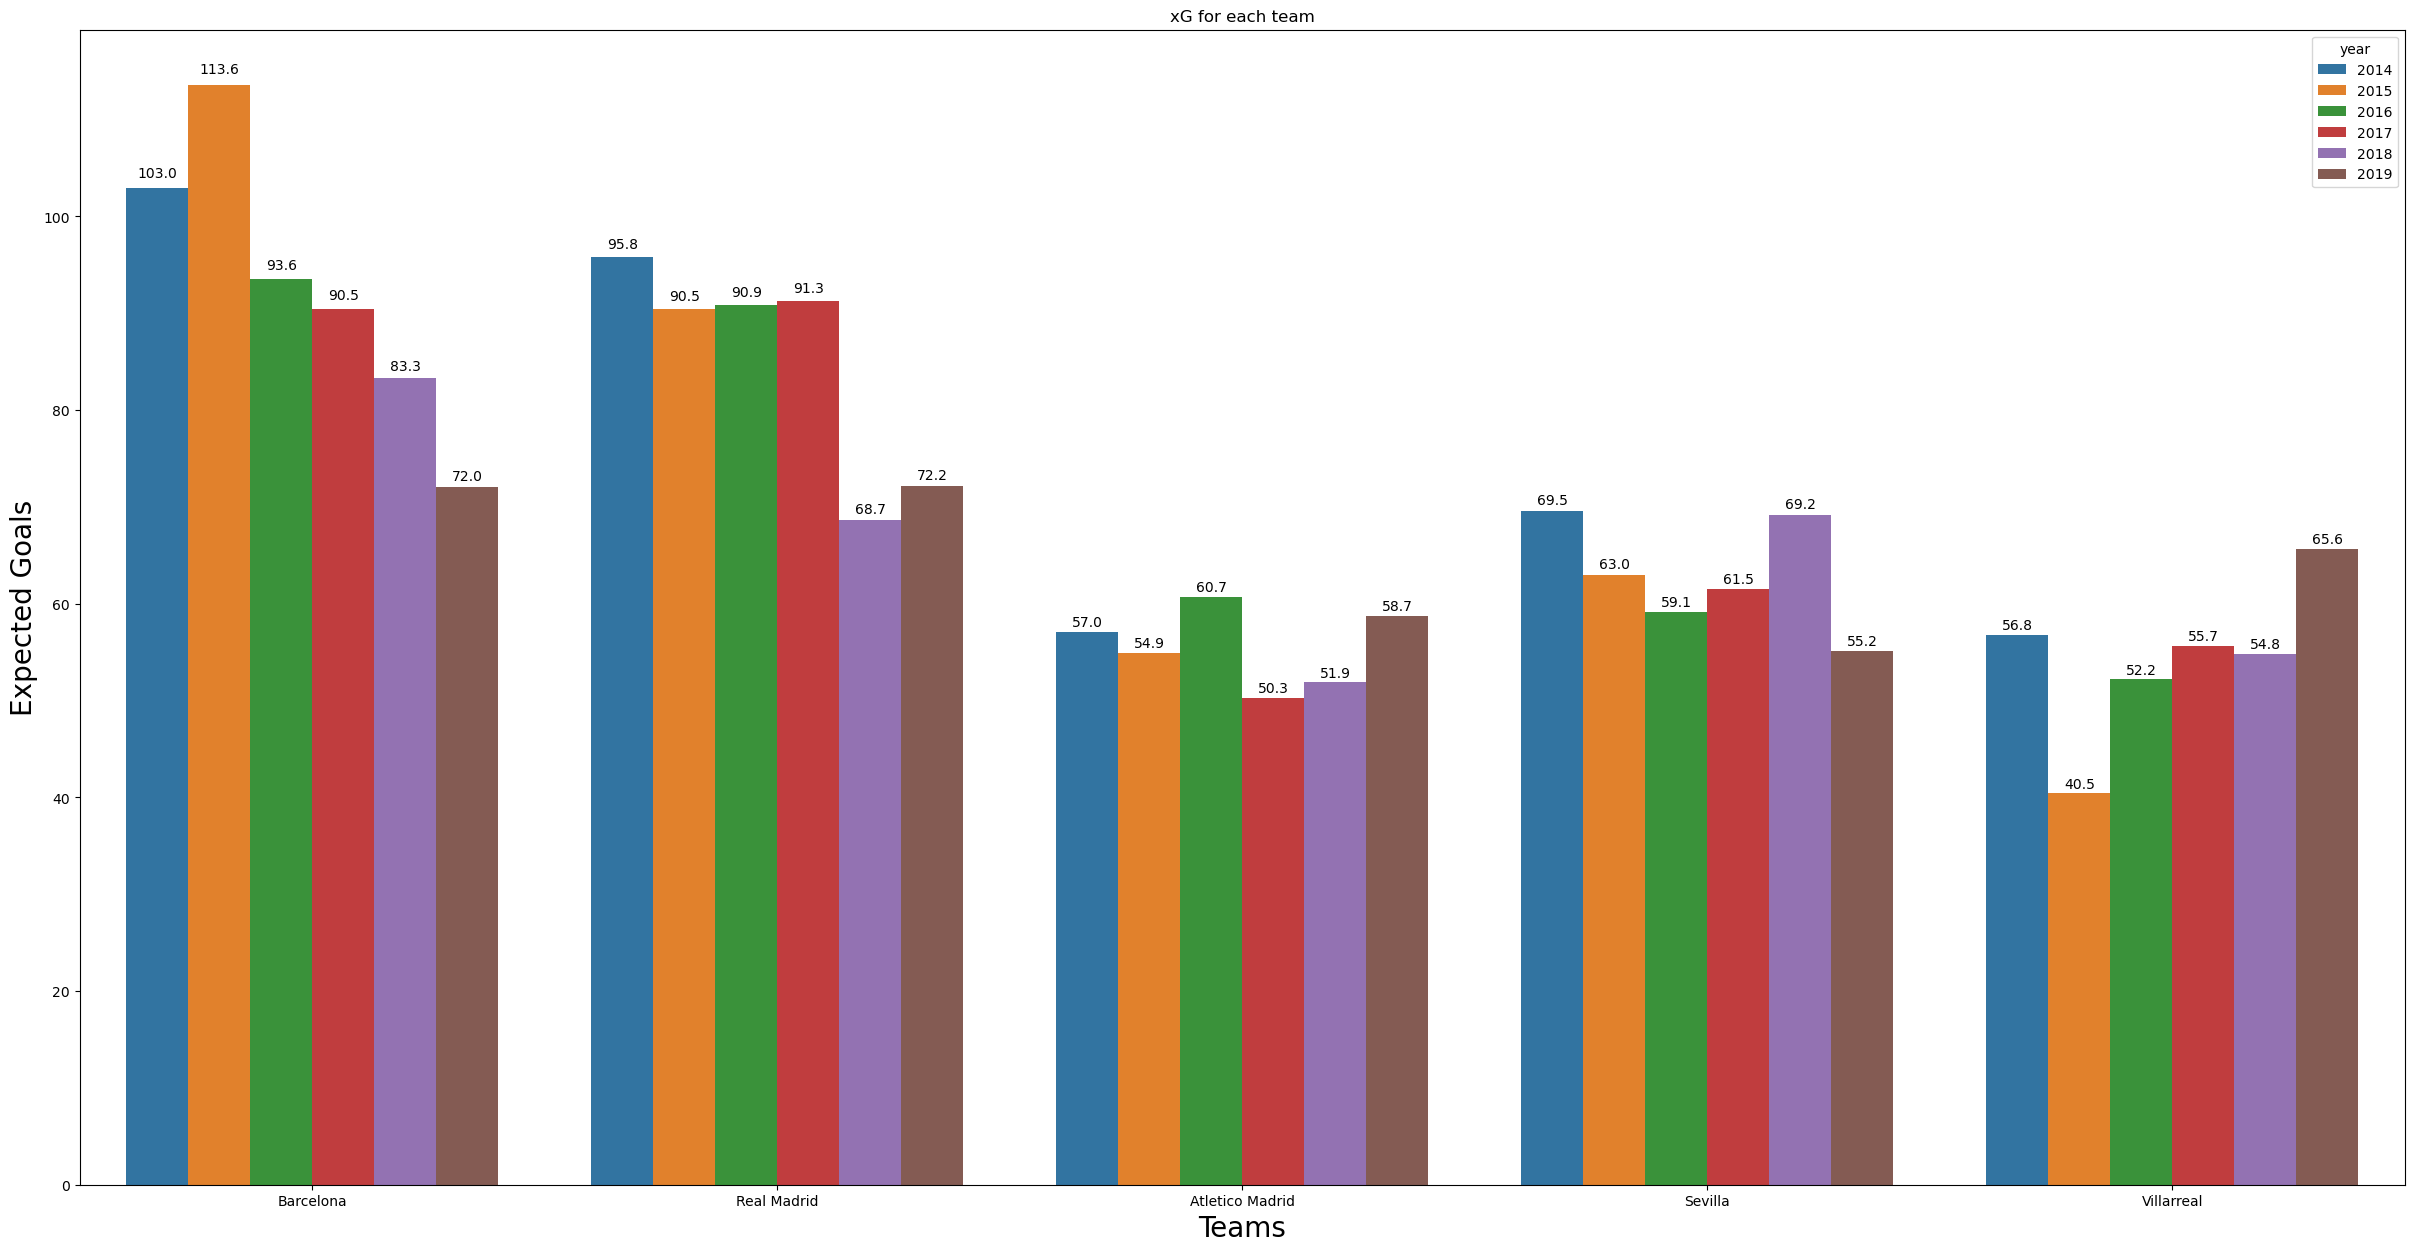

In [9]:
top_5 = ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Sevilla', 'Villarreal']
top_5_data = la_liga[la_liga['team'].isin(top_5)]
plt.figure(figsize=(30,15))
goals_scored = sns.barplot(x="team", y ="xG", hue = "year", data = top_5_data, ci = None)
show_values(goals_scored)
plt.xlabel("Teams", size = 20)
plt.ylabel("Expected Goals", size = 20)
plt.xticks(rotation=0)
plt.title("xG for each team")
plt.show()

For this graph, the x-axis is the number of xG sorted per year by color and the y-axis is the top 5 teams in terms of games won. This graph shows that for the 2014 and 2015 season Barcelona has dominated the league in terms of xG with a whopping 103 and 113.6 as compared to the 2nd highest in the league, Real Madrid, with an xG of 95.8 and 90.5. While as for Atletico Madrid, Sevilla, and Villarreal their xG ranges from 40-69.5. This shows that in terms of xG there is a huge gap between the top 2 teams of Spain and the other teams.

### 3.1.2 Correlation between xG and wins

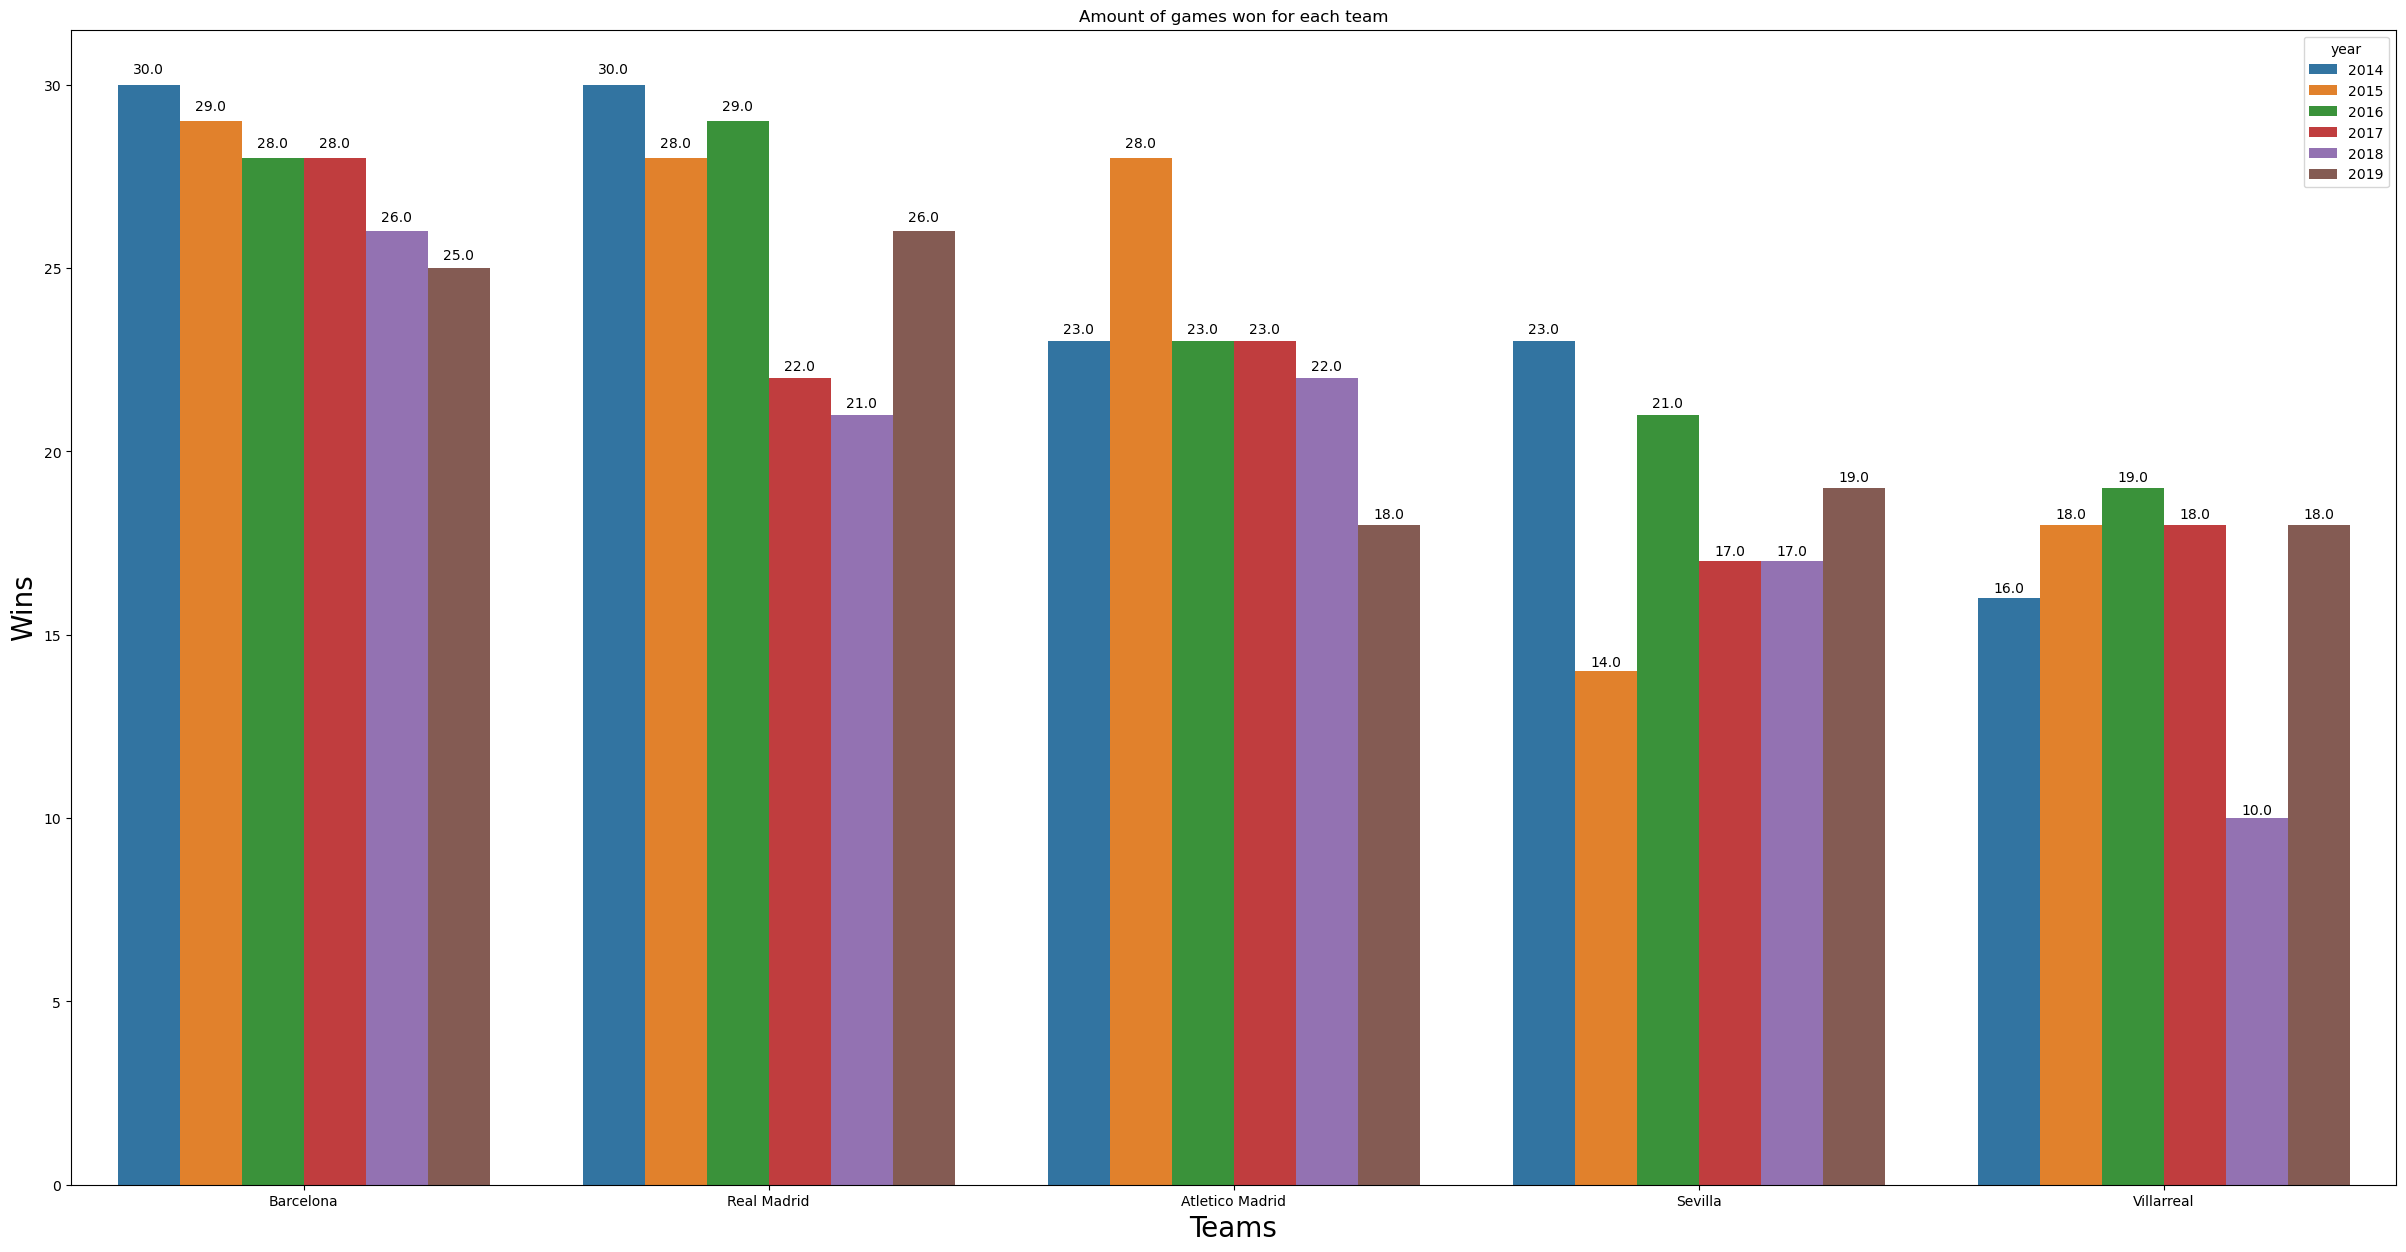

In [10]:
plt.figure(figsize=(30,15))
goals_scored = sns.barplot(x="team", y ="wins", hue = "year", data = top_5_data, ci = None)
show_values(goals_scored)
plt.xlabel("Teams", size = 20)
plt.ylabel("Wins", size = 20)
plt.xticks(rotation=0)
plt.title("Amount of games won for each team")
plt.show()

Based on the graph above, Barcelona and Real Madrid have each won 30 games in the 2014 season. And for the 2015 season, 29 wins and 28 wins respectively. Atletico Madrid with 23 and 28 wins, Sevilla with 23 and 14 wins, Villarreal with 16 and 18 wins for the 2014 and 2015 seasons.
This corresponds to the graph for xG as Barcelona and Real Madrid have higher xG as compared to the rest of the teams. Therefore, creating a direct relationship between xG and wins.
With that being said, there is a huge outlier with the 2015 season whereby, Sevilla only managed 14 wins with an xG of 63.0. To shine more light on this, in the 2016 season they had an xG of 59.1 but they managed 21 wins. This shows that there are other factors contributing to the amount of wins a team can get in a season, which I will be further exploring in this report.

## 3.2 Analysis of PPDA and OPPDA

In [11]:
winner_teams = ['Barcelona', 'Real Madrid', 'Atletico Madrid' , 'Sevilla', 'Villarreal']
la_df_winner_teams = la_liga[la_liga['team'].isin(top_5)]
la_winner_teams_groupping = la_df_winner_teams.groupby('team')[['ppda_coef', 'oppda_coef']].sum().sort_values(by='ppda_coef', ascending=False).head()
la_winner_teams_groupping.reset_index(inplace=True)
la_winner_teams_groupping

,team,ppda_coef,oppda_coef
0,Villarreal,63.23,63.09
1,Atletico Madrid,59.09,59.08
2,Real Madrid,56.67,84.17
3,Sevilla,52.01,63.30
4,Barcelona,44.78,95.45


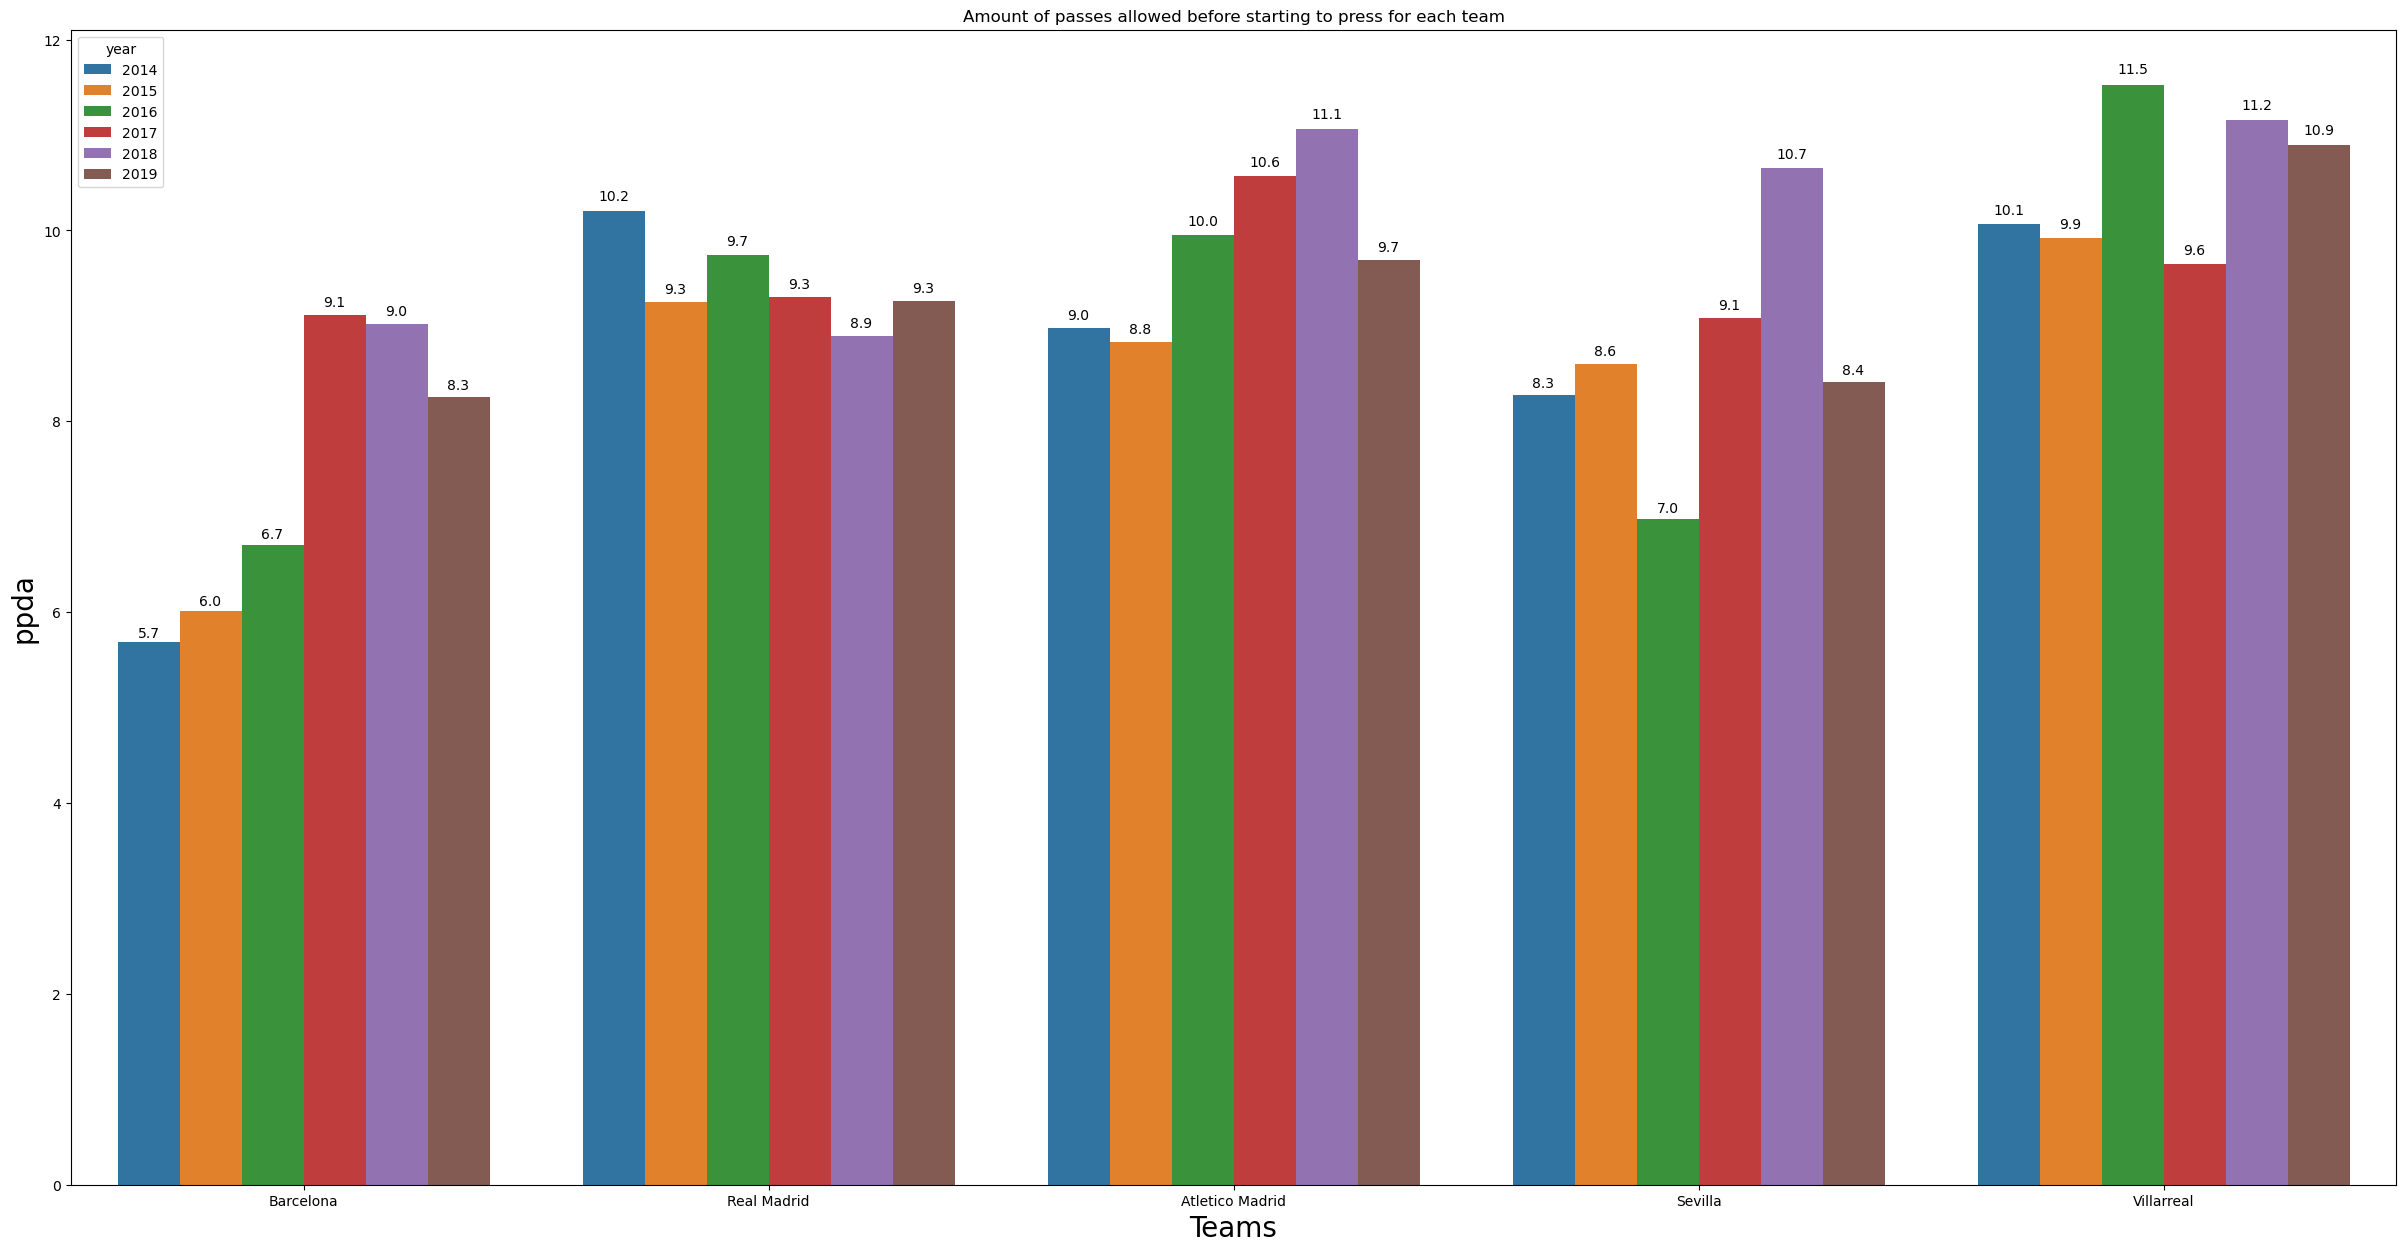

In [12]:
plt.figure(figsize=(30,15))
goals_scored = sns.barplot(x="team", y ="ppda_coef", hue = "year", data = top_5_data, ci = None)
show_values(goals_scored)
plt.xlabel("Teams", size = 20)
plt.ylabel("ppda", size = 20)
plt.xticks(rotation=0)
plt.title("Amount of passes allowed before starting to press for each team")
plt.show()

For PPDA, the lower the score would equate to the team playing a more intense style. For example, in 2014 there is a huge contrast between Barcelona and Real Madrid whereby they had a PPDA score of 5.7 and 10.2 respectively. This meant that they allowed their opponent on average 5.7 and 10.2 passes before they start trying to get the ball back. As for Atletico Madrid, Sevilla, and Villarreal they averaged 9.0, 8.3, and 10.1 respectively and for their games won they had 23, 23 and 16 wins respectively. 
### 3.2.1	Correlation between PPDA and wins
I believe there is no correlation between PPDA and wins as in the 2014 season, Barcelona and Real Madrid had very different PPDA scores, but both achieved the same number of wins. Villarreal averaged a PPDA score of 10.1 but only managed 16 wins but for Atletico Madrid and Sevilla they achieved a lower PPDA score of 9.0 and 8.3 but got 7 more wins. Thus, I believe that PPDA doesn’t have much effect on the number of wins.

### 3.2.2 OPPDA

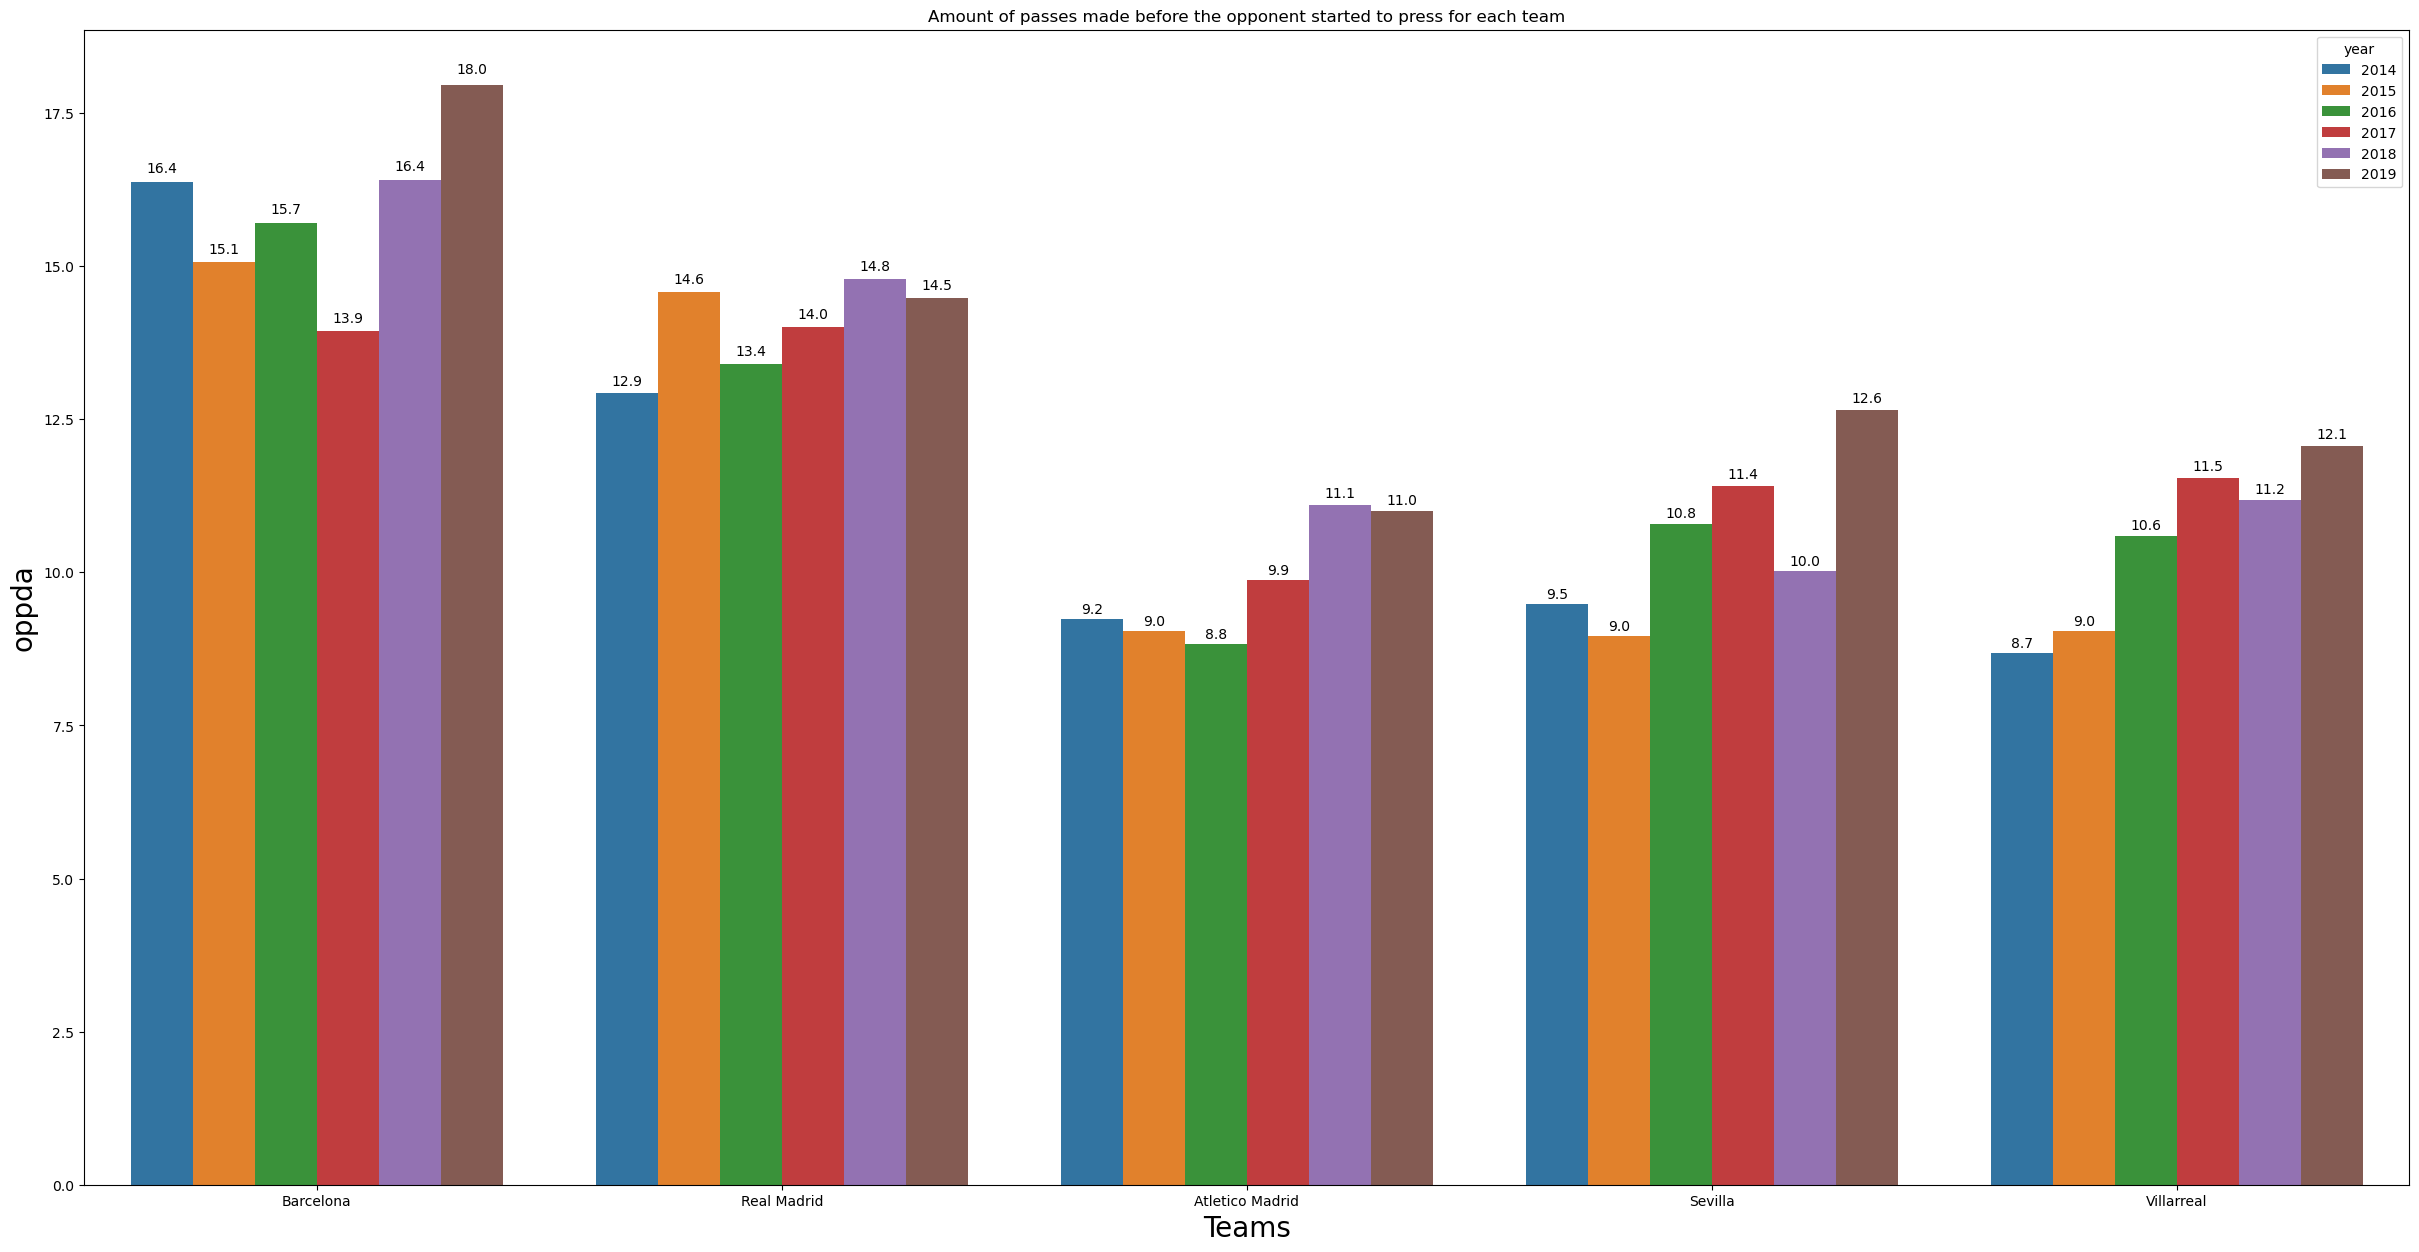

In [13]:
plt.figure(figsize=(30,15))
goals_scored = sns.barplot(x="team", y ="oppda_coef", hue = "year", data = top_5_data, ci = None)
show_values(goals_scored)
plt.xlabel("Teams", size = 20)
plt.ylabel("oppda", size = 20)
plt.xticks(rotation=0)
plt.title("Amount of passes made before the opponent started to press for each team")
plt.show()

In the 2014 season, Barcelona and Real Madrid had an OPPDA score of 16.4 and 12.9 respectively and 30 wins each, whilst the other 3 teams had scores ranging from 8.7 to 9.5 and 23 wins for both Atletico Madrid and Sevilla while Villarreal only managed 16 wins.

### 3.2.3	Correlation between OPPDA and wins
The fact that even though Real Madrid had a lower OPPDA score they managed to get the same amount of wins as Barcelona shows that there isn’t a clear relationship between OPPDA and wins.


### 3.2.4 Further analysis of OPPDA and PPDA

/var/folders/z0/9k93rh616t3_wm94klybs6200000gn/T/ipykernel_86538/1794315066.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'k-', color = 'black',linewidth=4)


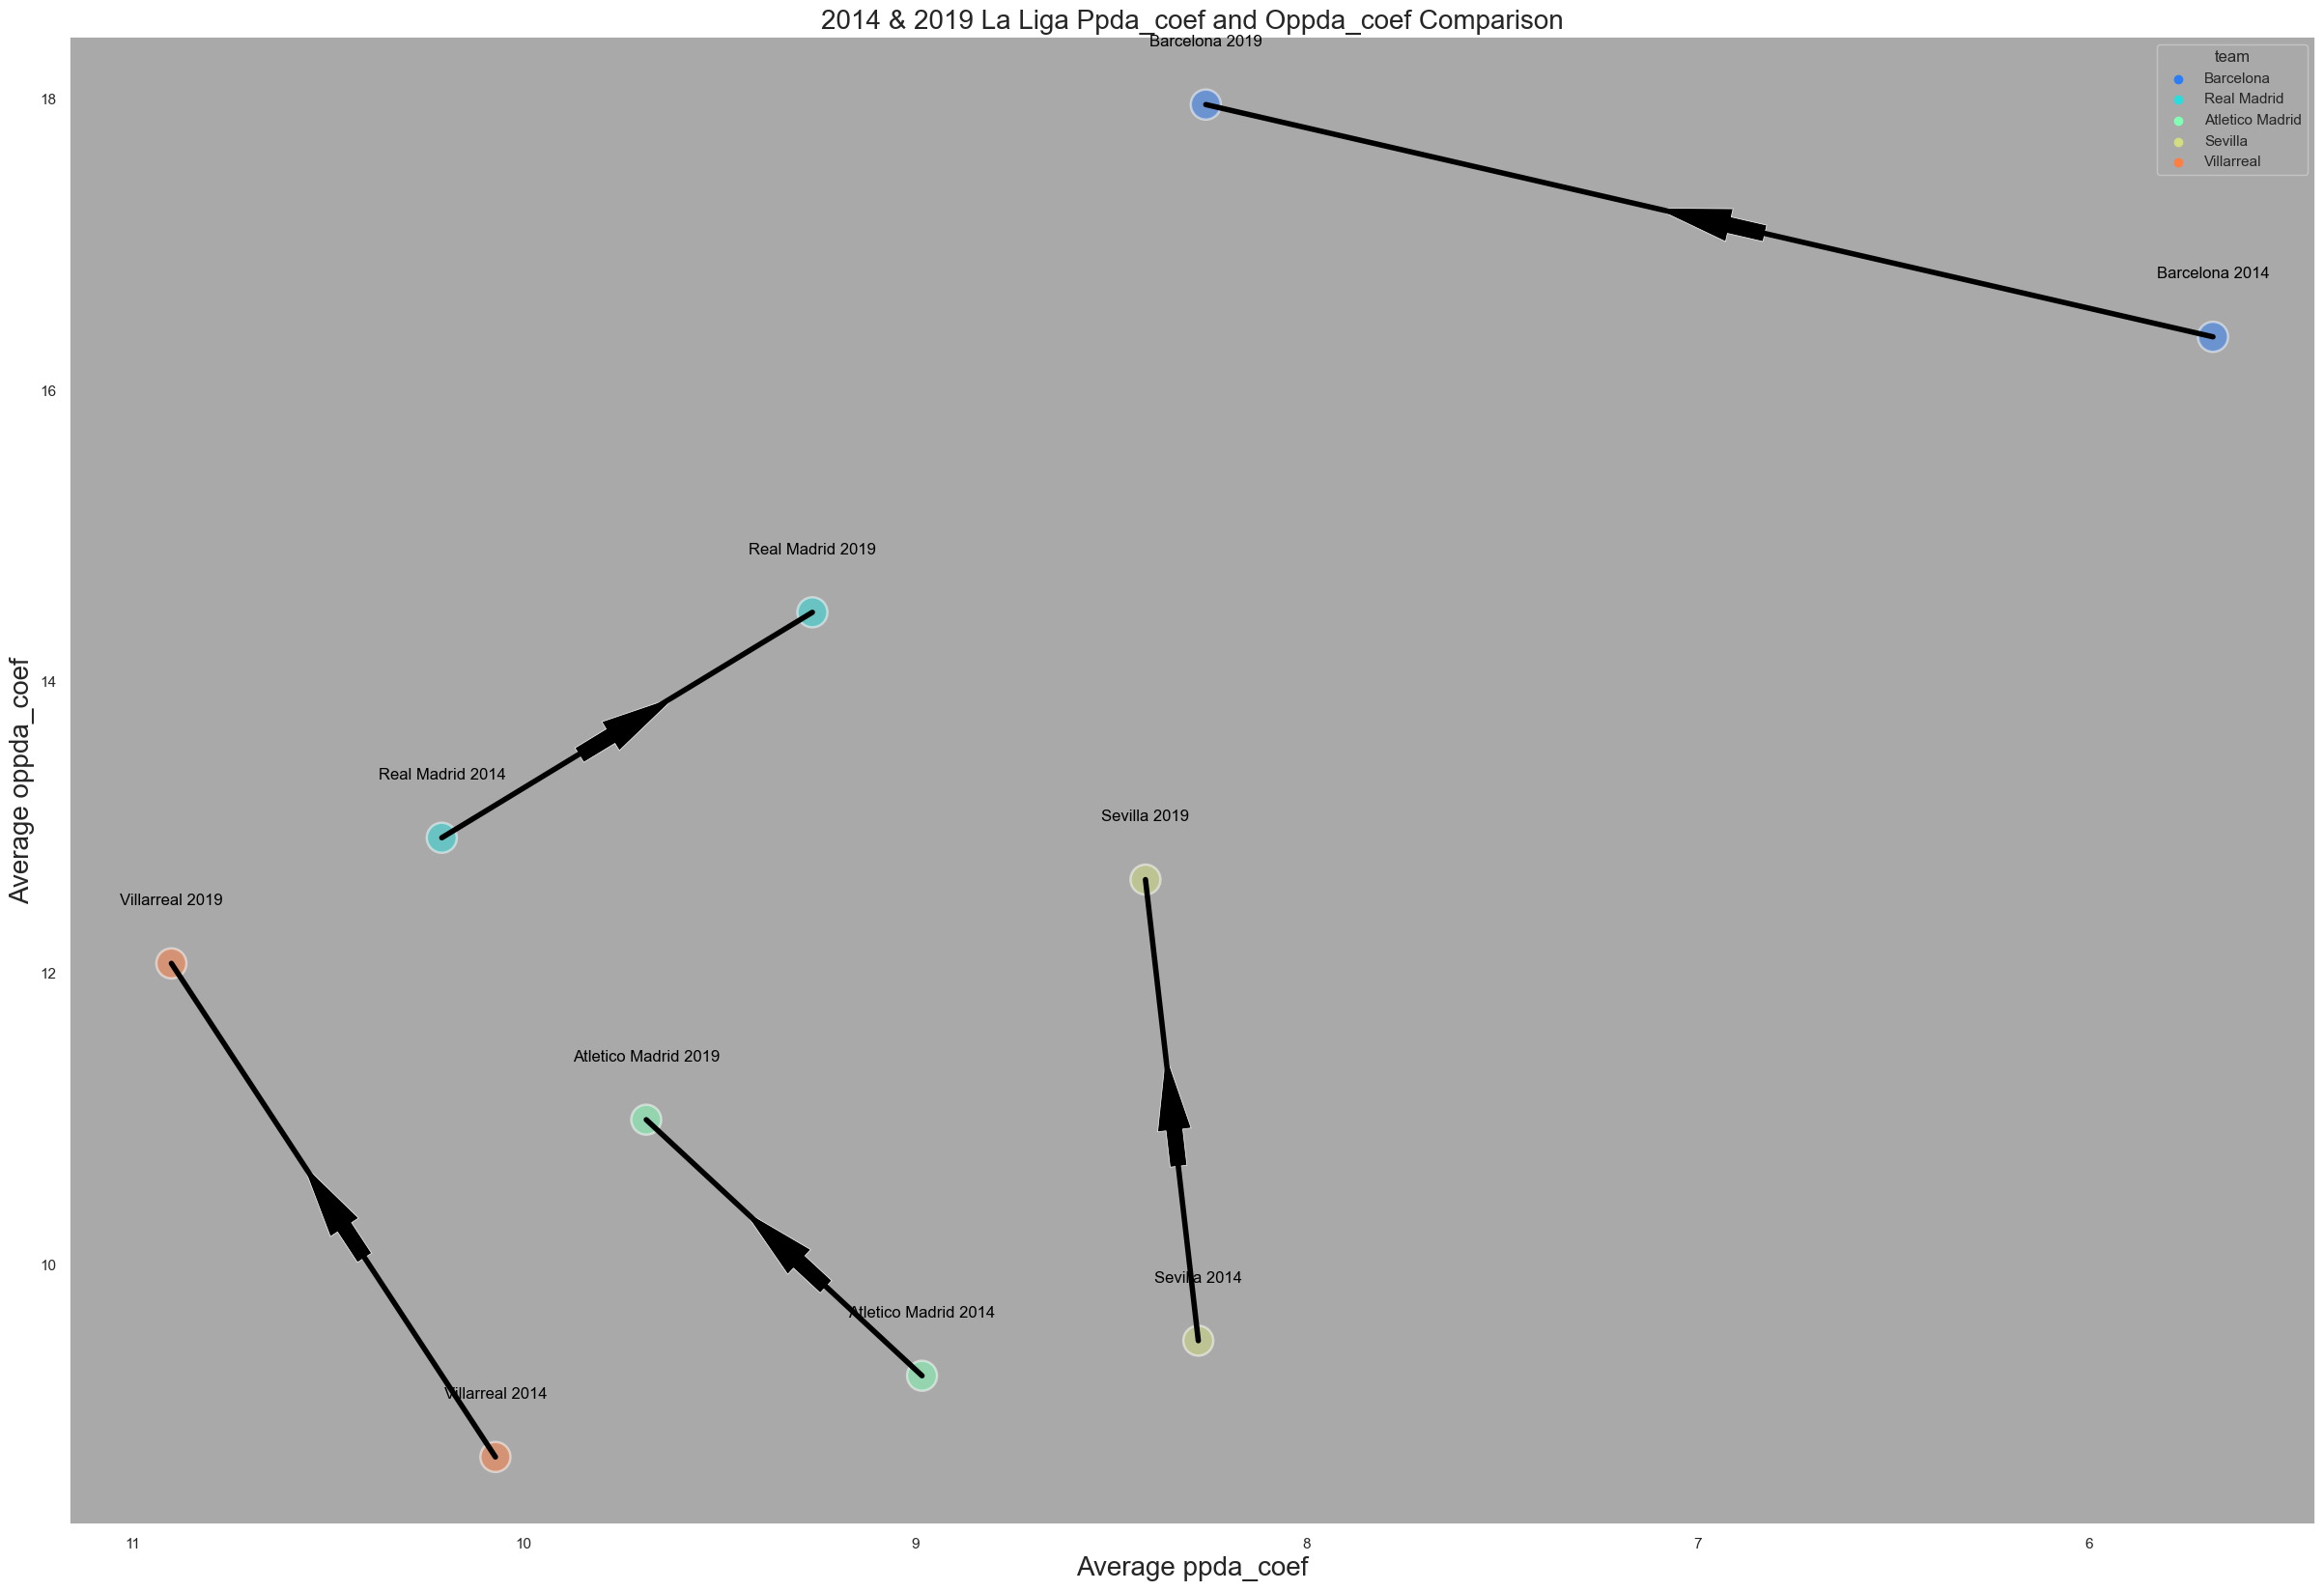

In [14]:
## Creates a scatterplot for OPPDA and PPDA comparison between 2014 and 2019 season
plt.figure(2,figsize=(30,20))
sns.set(rc={'axes.facecolor':'darkgray'})
sns.scatterplot(x="ppda_coef", y="oppda_coef",hue="team",s=500,alpha=0.5 ,data=top_5_data[(top_5_data["year"]==2019) | (top_5_data["year"]==2014)],palette="rainbow",legend="full")
for i, row in top_5_data[(top_5_data["year"]==2019) | (top_5_data["year"]==2014)].iterrows():  
    plt.text(row["ppda_coef"],row["oppda_coef"]+0.4, row["team"]+" "+str(row["year"]),ha="center",color="black")
for i in top_5_data["team"].unique():
    if ((top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2014)]).shape[0]!=0) & ((top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2019)]).shape[0]!=0) :   
        x1=top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2014)]["ppda_coef"].values
        y1=top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2014)]["oppda_coef"].values
        x2=top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2019)]["ppda_coef"].values
        y2=top_5_data[(top_5_data["team"]==i) & (top_5_data["year"]==2019)]["oppda_coef"].values
        norm=((x2-x1)**2+(y2-y1)**2)**(1/2)
        plt.plot([x1, x2], [y1, y2], 'k-', color = 'black',linewidth=4) 
#         plt.arrow(x1+(x2-x1)/2, y1+(y2-y1)/2, (x2-x1)/norm, (y2-y1)/norm, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.quiver(x1+(x2-x1)/2, y1+(y2-y1)/2, (x2-x1)/norm, (y2-y1)/norm , angles="xy", 
                   scale=20,headwidth=2,headlength=4.5,linewidth=0.5, color = 'black', pivot="mid")
plt.xlabel("Average ppda_coef", size = 20)
plt.ylabel("Average oppda_coef", size = 20)
plt.gca().invert_xaxis()
plt.grid(False)
plt.xticks(rotation=0)
plt.title("2014 & 2019 La Liga Ppda_coef and Oppda_coef Comparison", size = 20)
plt.show()

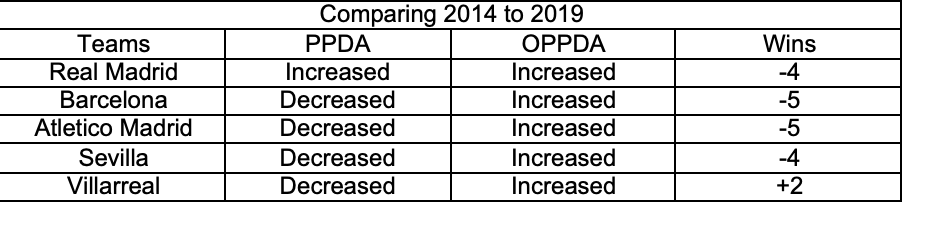

This shows that a lower PPDA and higher OPPDA would generally result in a lower number of wins. But there are 2 outliers to note, Real Madrid and Villarreal. Hence, I still believe that OPPDA and PPDA are inconsistent and shouldn’t be a large factor affecting the win rate.

## 3.3 Analysis of Goals scored

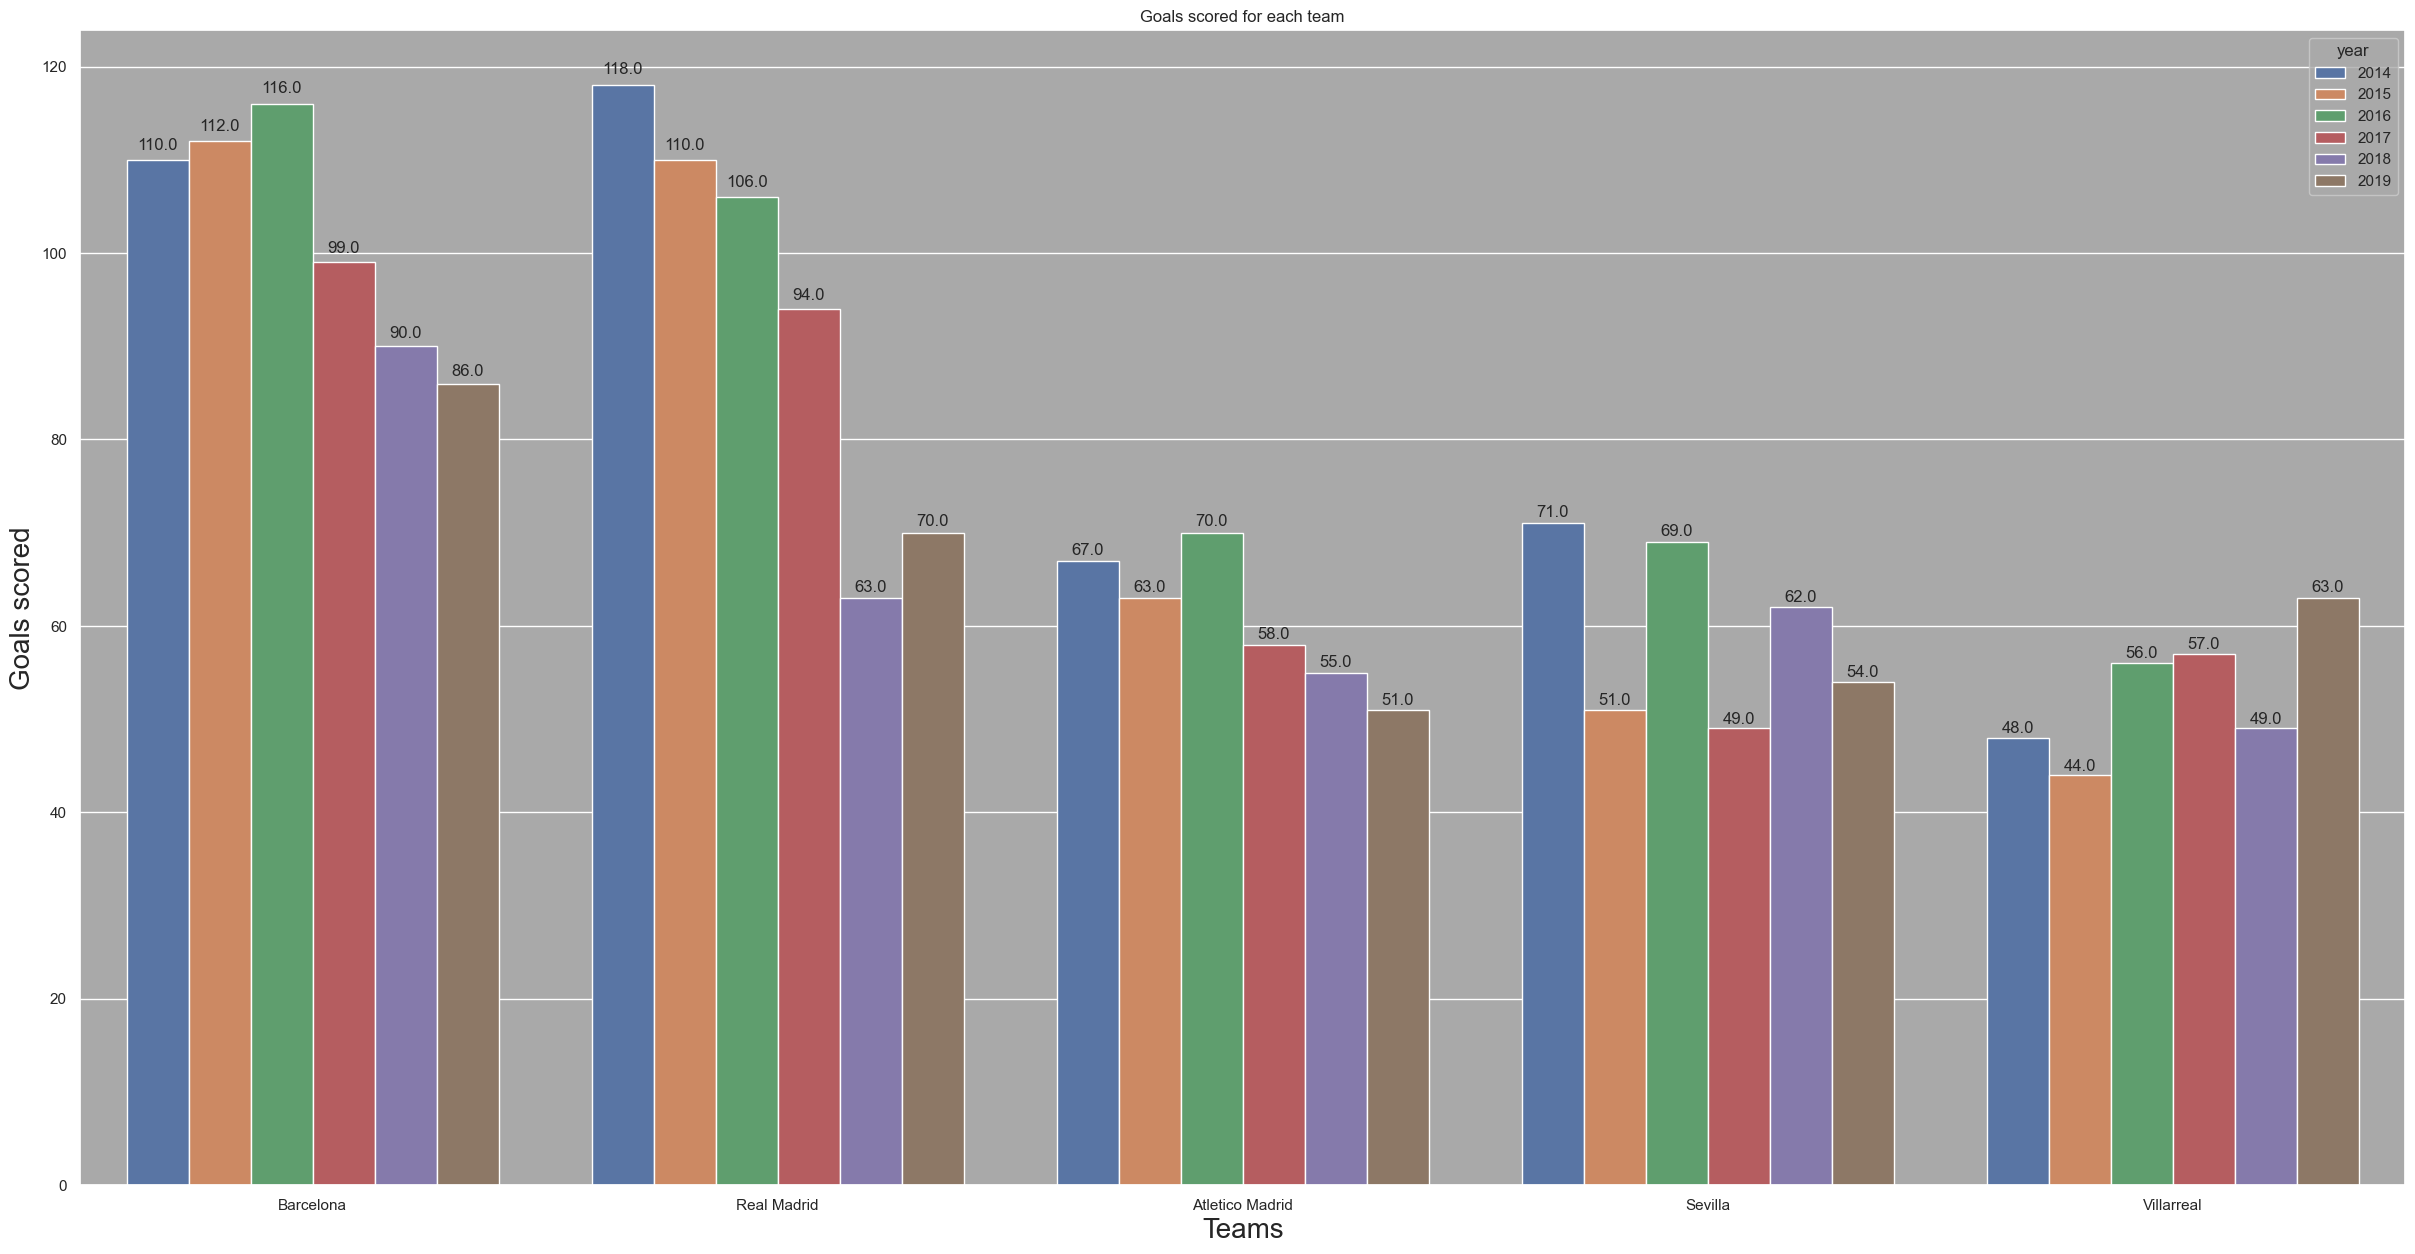

In [15]:
plt.figure(figsize=(30,15))
goals_scored = sns.barplot(x="team", y ="scored", hue = "year", data = top_5_data, ci = None)
show_values(goals_scored)
plt.xlabel("Teams", size = 20)
plt.ylabel("Goals scored", size = 20)
plt.xticks(rotation=0)
plt.title("Goals scored for each team")
plt.show()

There is a famous saying in the footballing world, “Whichever team scores more goals usually wins” – Michael Owen. In the 2014 season, Barcelona and Real Madrid scored 110 and 118 goals respectively and they both won 30 games each. Whereas for Atletico, Sevilla and Villarreal they scored 67, 71, and 48 goals respectively and only won 23, 23, and 16 games respectively.

### 3.3.1	Relationship between Goals scored and wins
This shows that there is a direct relationship between goals scored and wins whereby Barcelona and Real Madrid scored more goals than Atletico, Sevilla, and Villarreal, and got more wins as well.


## 3.4 Analysis of Deep passes

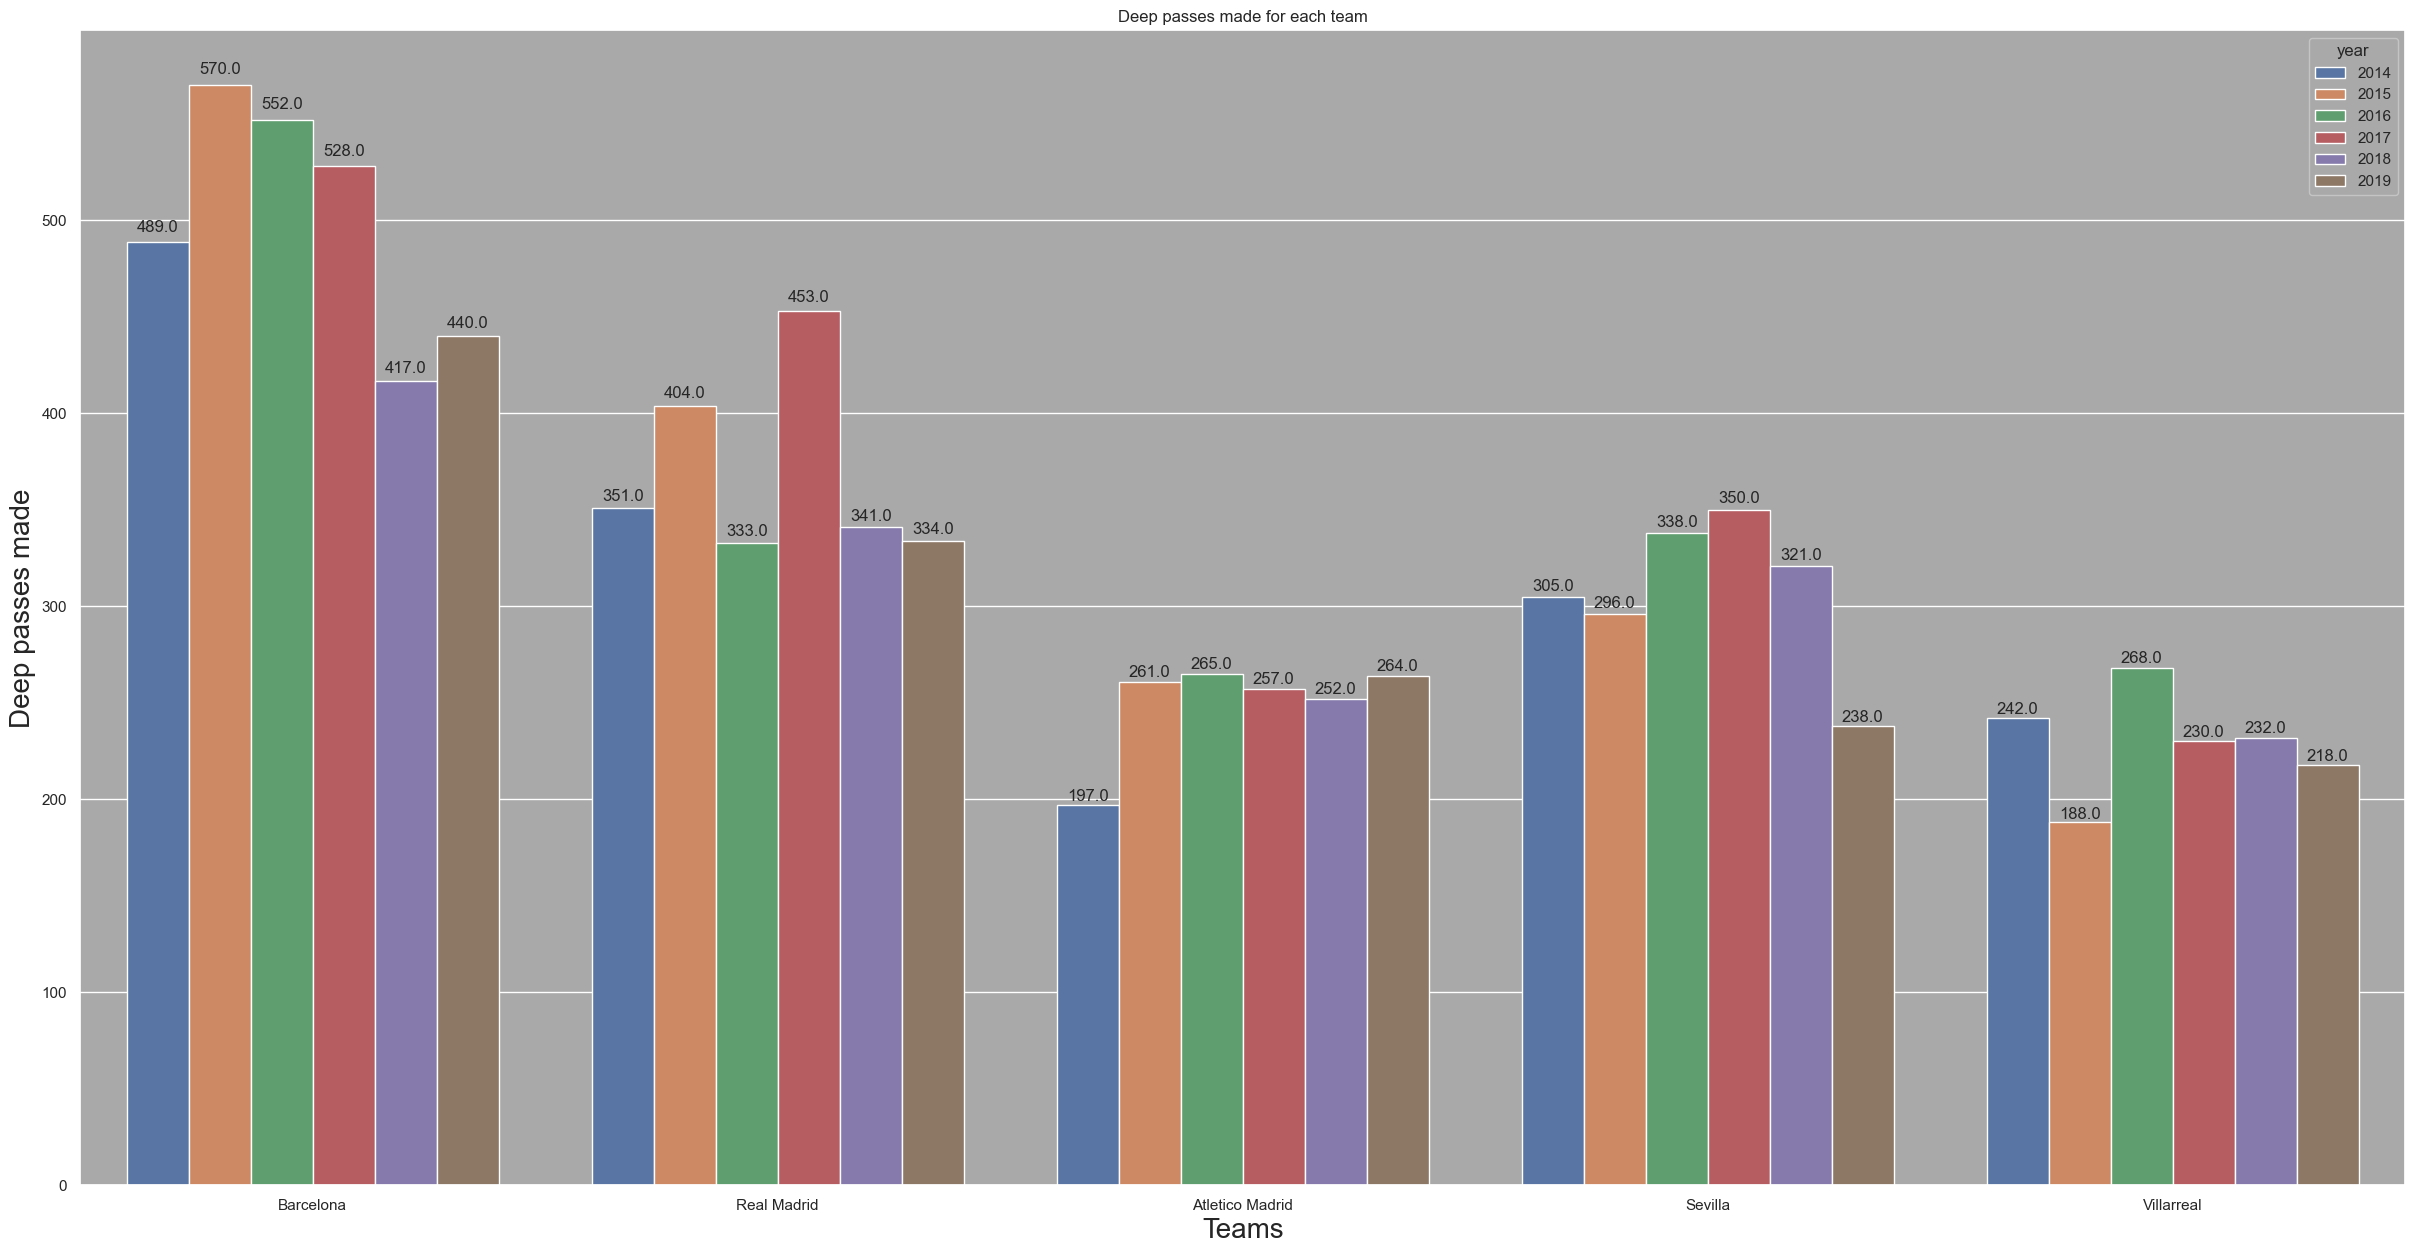

In [16]:
plt.figure(figsize=(30,15))
deep_passes_made = sns.barplot(x="team", y ="deep", hue = "year", data = top_5_data, ci = None)
show_values(deep_passes_made)
plt.xlabel("Teams", size = 20)
plt.ylabel("Deep passes made", size = 20)
plt.xticks(rotation=0)
plt.title("Deep passes made for each team")
plt.show()

### 3.4.1 Relationship between Deep passes made and wins
As seen from the graph above, Barcelona have separated themselves from the pack with a whopping 489 deep passes made with Real Madrid in second with 361 and following close behind is Sevilla with 305, Villarreal and Atletico with 242 and 197 respectively. Barcelona and Real Madrid both have 30 wins, Atletico and Sevilla have 23 wins, and Villarreal has 16 wins. This shows that there isn't a clear showing that there's a relationship between deep passes made and games won as it is fairly inconsistent.

### 3.4.2 Analysis of Deep passes conceded

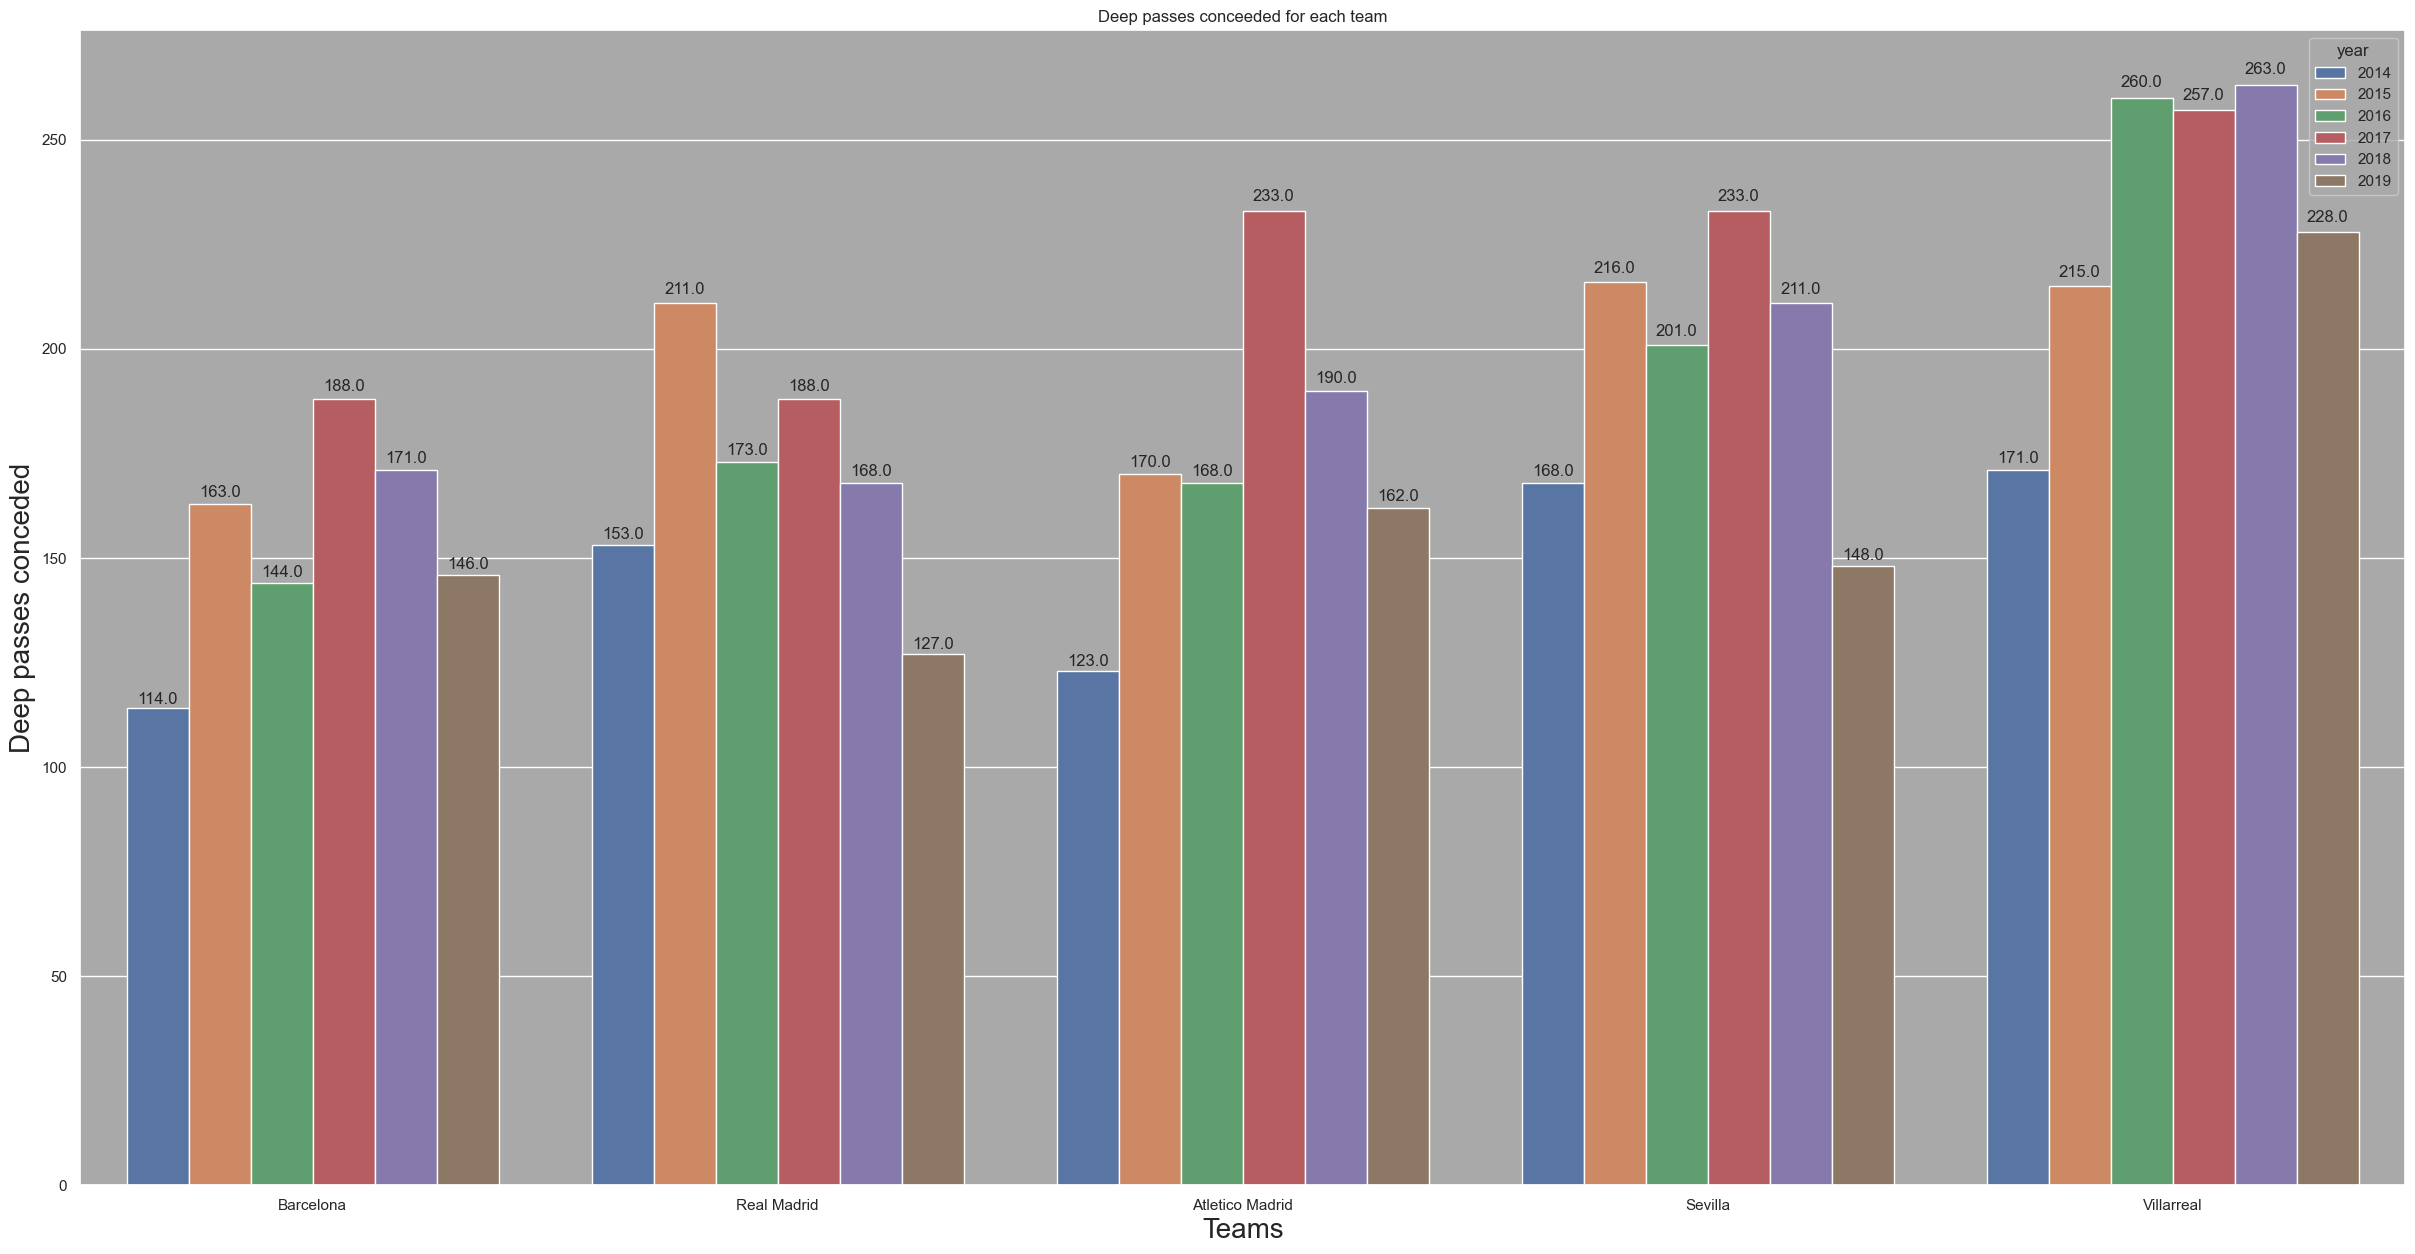

In [17]:
plt.figure(figsize=(30,15))
deep_passes_conceded = sns.barplot(x="team", y ="deep_allowed", hue = "year", data = top_5_data, ci = None)
show_values(deep_passes_conceded)
plt.xlabel("Teams", size = 20)
plt.ylabel("Deep passes conceded", size = 20)
plt.xticks(rotation=0)
plt.title("Deep passes conceeded for each team")
plt.show()

Barcelona and Real Madrid as compared to Atletico Madrid, Sevilla, and Villarreal have conceded much lesser in terms of deep passes conceded as seen from the 2017 season, where Barcelona and Real Madrid conceded 188 and 185 deep passes respectively. Whilst Atletico, Sevilla, and Villarreal conceded 233, 233, 257 deep passes.

Looking at the wins for the 2017 season, Barcelona and Real Madrid had 28 and 22 wins respectively. Whilst Atletico, Sevilla, and Villarreal had 23, 17, and 18 wins respectively. This shows that there is a relationship between deep passes conceded and the number of games won as in general most of the teams that conceded more deep passes didn't win as much games as those that conceded lesser deep passes.

## 4 Conclusion
Through the graphs generated and analysis made, it is safe to say that there isn't only 1 factor contributing to the win rate of football. The first factor that I had analyzed was xG and it showed that there was a direct relationship between xG and wins. The second factor, deep passes made, showed that the more deep passes a team made, the more often they would win. The third factor, deep passes conceded, showed that the lesser a team concededs deep passes, the more often they would win.
This just shows that there are many factors contributing to a win in football, and it doesn't just limit to those elements that i've researched about as there are many other factors that i've yet to explore.


## 5 References and Resources

## 5.1 References
PPDA analysis [1] - Pilotto, M. (2018) Measuring the intensity of pressing, Medium. Calcio Datato. Available at: https://medium.com/calcio-datato/measuring-the-intensity-of-pressing-2763bac927c2 (Accessed: January 8, 2023). 

xG analysis [2] - What is xg? how is it calculated?: Statsbomb: Data Champions (2022) StatsBomb. Available at: https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/ (Accessed: January 8, 2023). 
## 5.2 Resources
Data file: Aknkaradeniz (2022) Football_ab_test, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/aknkaradeniz/football-ab-test/data (Accessed: January 8, 2023). 